# Núcleos de convolución no lineales

$$ Loss = \max \left( \sum_{i=1}^n b_i - \frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n y_i b_i (x_i \cdot x_j)y_j b_j \right) $$

Sujeto a las siguientes restricciones:
$$ \sum_{i=1}^n b_i y_i = 0 $$
$$ 0 \le b_i \le \frac{1}{2n\gamma} $$

$ k \equiv $ nucléo (**kernel**) de la SVM
- Caso lineal $ \rightarrow k(x_i, x_j) = x_i \cdot x_j $
- Caso general $ \rightarrow k(x_i, x_j) = \phi(x_i) \cdot \phi(x_j) $

- Kernel Gaussiano: $ k(x_i, x_j) = e^{-\gamma||x_i - x_j||^2} $
- Predicción: $ k(x_i, p_j) = e^{-\gamma||x_i - p_j||^2} \rightarrow p_j \equiv $ predicción del punto

- Kernel polinomial homogéneo: $ k(x_i, x_j) = (x_i \cdot x_j)^d $
- Kernel polinomial no homogéneo: $ k(x_i, x_j) = (x_i \cdot x_j + 1)^d $
- Kernel de la tangente hiperbólica: $ k(x_i, x_j) = tanh(a x_i \cdot x_j + k) $

In [142]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

In [158]:
session = tf.Session()

In [144]:
(x_vals, y_vals) = datasets.make_circles(n_samples=500, factor=0.5, noise=0.1)

In [145]:
y_vals

array([1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,

In [146]:
y_vals = np.array([1 if y == 1 else -1 for y in y_vals])

In [147]:
x_vals

array([[ 1.27315371e-01,  5.09642889e-01],
       [ 4.42280806e-01,  6.62645339e-01],
       [ 4.57134112e-01,  9.09195853e-01],
       [-1.03347996e+00,  2.28454670e-01],
       [-4.07123589e-01,  1.83155006e-01],
       [-5.39131919e-01,  8.50413165e-03],
       [ 3.85627496e-01, -3.09928139e-01],
       [-6.05191053e-01,  7.53258806e-01],
       [ 3.07746484e-01, -8.87765201e-01],
       [-2.01801643e-01, -1.67282328e-01],
       [-6.82049167e-01,  8.27958628e-01],
       [-3.07268038e-01,  3.97508433e-01],
       [ 7.53090627e-01, -5.69394950e-01],
       [-9.40944350e-02, -5.37147812e-01],
       [-7.09605321e-01, -9.06069628e-01],
       [ 2.14617987e-01, -5.17184879e-01],
       [ 3.11491719e-01, -9.38921346e-01],
       [-3.91291809e-01, -3.97991961e-01],
       [ 9.75107160e-01,  1.93615352e-02],
       [-7.71952315e-02,  1.09099623e+00],
       [ 9.07436583e-01,  4.83193133e-01],
       [ 7.95775598e-01, -6.09894423e-01],
       [-6.14627714e-01,  3.50576033e-01],
       [ 2.

In [148]:
class1_x = [x[0] for i, x in enumerate(x_vals) if y_vals[i] == 1]
class1_y = [x[1] for i, x in enumerate(x_vals) if y_vals[i] == 1]

class2_x = [x[0] for i, x in enumerate(x_vals) if y_vals[i] == -1]
class2_y = [x[1] for i, x in enumerate(x_vals) if y_vals[i] == -1]

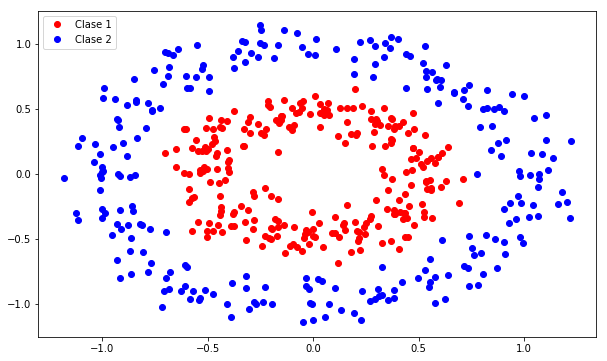

In [149]:
plt.figure(figsize=(10,6))
plt.plot(class1_x, class1_y, "ro", label="Clase 1")
plt.plot(class2_x, class2_y, "bo", label="Clase 2")
plt.legend(loc="upper left")
plt.show()

In [159]:
batch_size = 500

x_data = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
prediction_grid = tf.placeholder(shape=[None, 2], dtype=tf.float32)
b = tf.Variable(tf.random_normal(shape=[1, batch_size]))

In [160]:
gamma = tf.constant(-50.0)
dist = tf.reduce_sum(tf.square(x_data), axis=1) # Sumatorio por columnas
dist = tf.reshape(dist, [-1,1]) # Para poder hacer las opeeraciones matriciales
sq_distance = tf.add(tf.subtract(dist, tf.multiply(2.0, tf.matmul(x_data, tf.transpose(x_data)))), tf.transpose(dist))

# Kernel Gaussiano
kernel = tf.exp(tf.multiply(gamma, tf.abs(sq_distance))) 

In [161]:
first_sum = tf.reduce_sum(b) # Sumatorio de b_i

b_vect_cross = tf.matmul(tf.transpose(b), b) # b_i * b_j
y_target_cross = tf.matmul(y_target, tf.transpose(y_target)) # y_i * y_j
second_sum = tf.reduce_sum(tf.multiply(kernel, tf.multiply(b_vect_cross, y_target_cross)))

loss = tf.negative(tf.subtract(first_sum, second_sum))

In [162]:
rA = tf.reshape(tf.reduce_sum(tf.square(x_data), axis=1), [-1,1])
rB = tf.reshape(tf.reduce_sum(tf.square(prediction_grid), axis=1), [-1,1])

pred_sq_dist = tf.add(tf.subtract(rA, tf.multiply(2.0, tf.matmul(x_data, tf.transpose(prediction_grid)))), 
                      tf.transpose(rB))

pred_kernel = tf.exp(tf.multiply(gamma, tf.abs(pred_sq_dist)))

In [163]:
prediction_output = tf.matmul(tf.multiply(tf.transpose(y_target), b), pred_kernel)
prediction = tf.sign(prediction_output - tf.reduce_mean(prediction_output))

In [164]:
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.squeeze(prediction), tf.squeeze(y_target)), tf.float32))

In [165]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.002)
train = optimizer.minimize(loss) # Es lo mismo que maximizar la función del principio del todo

init = tf.global_variables_initializer()
session.run(init)

In [166]:
loss_vector = []
accuracy_vector = []

for i in range(1000):
    rand_idx = np.random.choice(len(x_vals), size=batch_size)
    rand_x = x_vals[rand_idx]
    rand_y = np.transpose([y_vals[rand_idx]])
    session.run(train, feed_dict={x_data: rand_x, 
                                  y_target: rand_y})
    
    temp_loss = session.run(loss, feed_dict={x_data: rand_x, 
                                             y_target: rand_y})
    
    loss_vector.append(temp_loss)
    
    temp_acc = session.run(accuracy, feed_dict={x_data: rand_x, 
                                                y_target: rand_y, 
                                                prediction_grid: rand_x})
    
    accuracy_vector.append(temp_acc)
    
    if (i+1)%100 == 0:
        print("Step #{} ==> Loss: {}, Accuracy: {}".format(i+1, temp_loss, temp_acc))

Step #100 ==> Loss: 233.91790771484375, Accuracy: 0.5920000076293945
Step #200 ==> Loss: 98.26841735839844, Accuracy: 0.5839999914169312
Step #300 ==> Loss: 48.627166748046875, Accuracy: 0.7379999756813049
Step #400 ==> Loss: 7.024065017700195, Accuracy: 0.8360000252723694
Step #500 ==> Loss: 0.8500480651855469, Accuracy: 0.878000020980835
Step #600 ==> Loss: -10.345640182495117, Accuracy: 0.9760000109672546
Step #700 ==> Loss: -10.642851829528809, Accuracy: 0.9940000176429749
Step #800 ==> Loss: -12.112581253051758, Accuracy: 1.0
Step #900 ==> Loss: -12.05609130859375, Accuracy: 1.0
Step #1000 ==> Loss: -12.110311508178711, Accuracy: 0.9980000257492065


In [177]:
x_min, x_max = x_vals[:,0].min()-1, x_vals[:,0].max()+1
y_min, y_max = x_vals[:,1].min()-1, x_vals[:,1].max()+1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
grid_points = np.c_[xx.ravel(), yy.ravel()]

In [178]:
grid_points

array([[-2.1834736 , -2.14246927],
       [-2.1634736 , -2.14246927],
       [-2.1434736 , -2.14246927],
       ...,
       [ 2.1765264 ,  2.13753073],
       [ 2.1965264 ,  2.13753073],
       [ 2.2165264 ,  2.13753073]])

In [179]:
[grid_predictions] = session.run(prediction, feed_dict={x_data: x_vals, 
                                                        y_target: np.transpose([y_vals]), 
                                                        prediction_grid: grid_points})

In [180]:
grid_predictions

array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)

In [181]:
grid_predictions = grid_predictions.reshape(xx.shape)
grid_predictions

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)

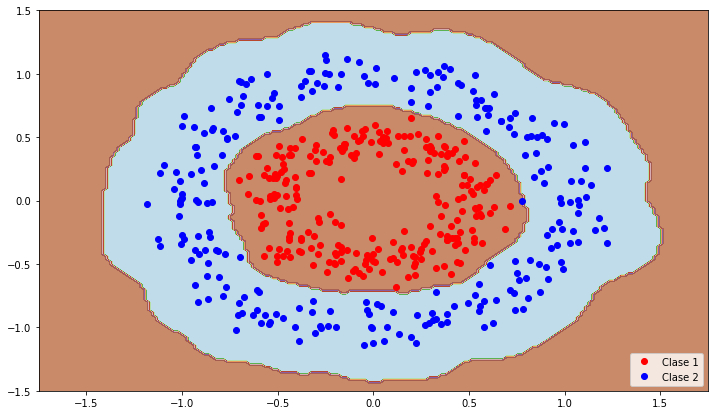

In [195]:
plt.figure(figsize=(12,7))
plt.contourf(xx, yy, grid_predictions, cmap=plt.cm.Paired, alpha=0.7)
plt.plot(class1_x, class1_y, "ro", label="Clase 1")
plt.plot(class2_x, class2_y, "bo", label="Clase 2")
plt.xlim([-1.75, 1.75])
plt.ylim([-1.5, 1.5])
plt.legend(loc="lower right")
plt.show()

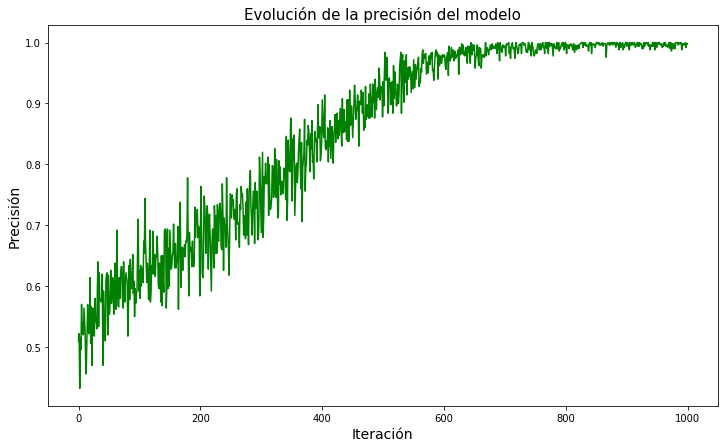

In [196]:
plt.figure(figsize=(12,7))
plt.plot(accuracy_vector, "g")
plt.xlabel("Iteración", fontsize=14)
plt.ylabel("Precisión", fontsize=14)
plt.title("Evolución de la precisión del modelo", fontsize=15)
plt.show()

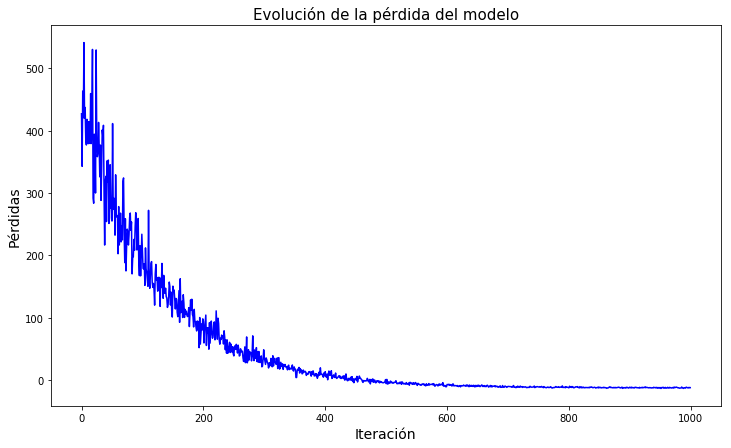

In [197]:
plt.figure(figsize=(12,7))
plt.plot(loss_vector, "b")
plt.xlabel("Iteración", fontsize=14)
plt.ylabel("Pérdidas", fontsize=14)
plt.title("Evolución de la pérdida del modelo", fontsize=15)
plt.show()